In [1]:
!pip install scikit-image

In [2]:
### Image Augmentation Techniques
'''
1. Image Rotation
2. Image Shifting
3. Image Flipping
4. Image Noising
5. Image Blurring
'''

# importing libraries
import numpy as np
import pandas as pd
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tqdm as tqdm


In [3]:

# libraries for performing image augmentation tasks
from skimage.transform import rotate
from skimage.util import random_noise
from skimage.filters import gaussian
from skimage.transform import AffineTransform, warp


In [4]:
### 1. Image Rotation

# reading the csv file
data = pd.read_csv('../data/Dataset/emergency_classification.csv')

print(data.head())



  image_names  emergency_or_not
0       0.jpg                 1
1       1.jpg                 1
2       2.jpg                 1
3       3.jpg                 1
4       4.jpg                 1


In [6]:
# create random number generator
seed = 42

# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
    # loading the image using its name
    img = plt.imread('../data/Dataset/images/' + img_name)
    # normalizing the pixel values
    img = img/255
    # saving each image in the list
    X.append(img)


In [7]:
# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data.emergency_or_not.values

# shape of original dataset
X.shape, y.shape

print(X.shape, y.shape)


(2352, 224, 224, 3) (2352,)


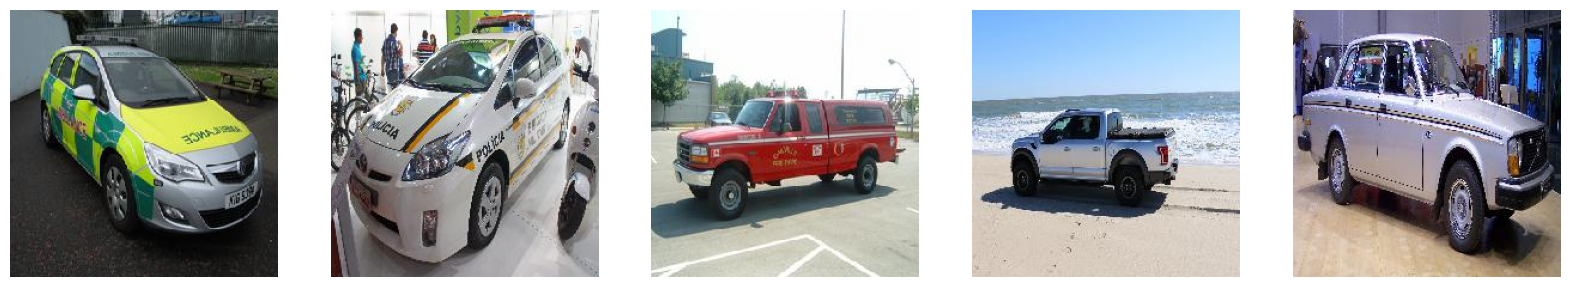

In [8]:
# visualizing images
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(20,20))
for i in range(5):
    ax[i].imshow(X[i*400])
    ax[i].axis('off')

plt.show()



In [9]:
## 2. Creating training and validation set
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

print((X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape))


((1646, 224, 224, 3), (1646,)) ((706, 224, 224, 3), (706,))


In [10]:
## 3. Augmenting Images
# augmenting the training images
final_train_data = []
final_target_train = []
for i in tqdm.tqdm(range(X_train.shape[0])):
    # original image
    final_train_data.append(X_train[i])
    # image rotation
    final_train_data.append(rotate(X_train[i], angle=30, mode = 'edge'))
    # image flipping (left-to-right)    
    final_train_data.append(np.fliplr(X_train[i]))
    # image flipping (up-down) 
    final_train_data.append(np.flipud(X_train[i]))
    # image noising
    final_train_data.append(random_noise(X_train[i],var=0.2))
    for j in range(5):
        final_target_train.append(y_train[i])


100%|████████████████████████████████████████████████| 1646/1646 [00:05<00:00, 295.94it/s]


In [11]:
# converting images and target to array
final_train = np.array(final_train_data)
final_target_train = np.array(final_target_train)


# shape of new training set
final_train.shape, final_target_train.shape 

print(final_train.shape, final_target_train.shape )


(8230, 224, 224, 3) (8230,)


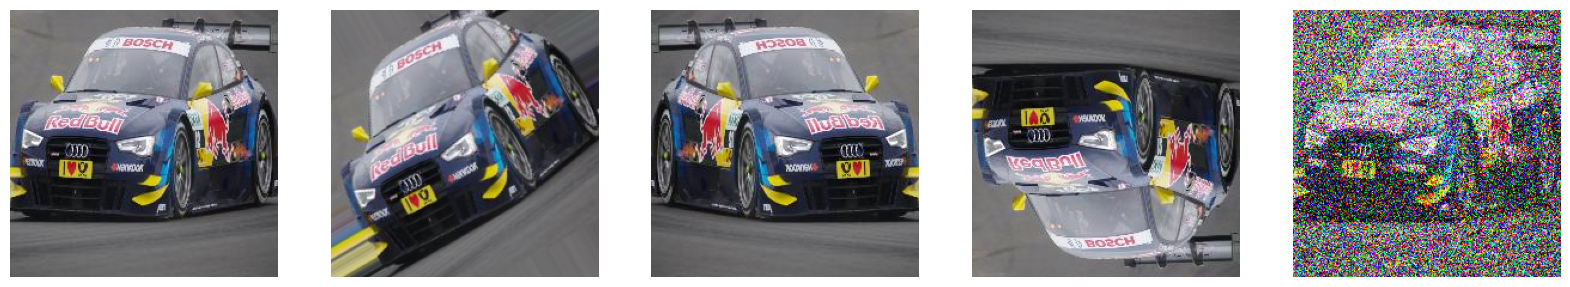

(8230, 150528)


In [12]:
# visualizing the augmented images
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(20,20))
for i in range(5):
    ax[i].imshow(final_train[i+30])
    ax[i].axis('off')
plt.show()

# converting 3 dimensional image to 1 dimensional image
final_train = final_train.reshape(final_train.shape[0], 224*224*3)
final_train.shape

print(final_train.shape)


In [13]:
# minimum and maximum pixel values of training images
final_train.min(), final_train.max()

print(final_train.min(), final_train.max())

# converting 3 dimensional validation image to 1 dimensional image
final_valid = X_valid.reshape(X_valid.shape[0], 224*224*3)
final_valid.shape

print(final_valid.shape)


0.0 1.0
(706, 150528)


In [14]:
# minimum and maximum pixel values of validation images
print(final_valid.min(), final_valid.max())

## 4. Defining the model architecture
from keras.layers import Dense, InputLayer, Dropout, BatchNormalization
from keras.models import Sequential
# importing adam optimizer from keras optimizer module 
from keras.optimizers import Adam

# defining the adam optimizer and setting the learning rate as 10^-5
adam = Adam(lr=1e-5)

# defining and compiling the model architecture
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(100, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])


# summary of the model
model.summary()


0.0 1.0


2024-02-04 17:14:00.192077: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-02-04 17:14:00.192097: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-02-04 17:14:00.192104: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-02-04 17:14:00.192449: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-04 17:14:00.192616: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               15052900  
                                                                 
 batch_normalization (Batch  (None, 100)               400       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 batch_normalization_1 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 100)               0

In [ ]:
# training the model
model_history = model.fit(final_train, final_target_train, epochs=50, batch_size=128,validation_data=(final_valid,y_valid))

from sklearn.metrics import accuracy_score

# Use the model.predict method to get the predicted probabilities
predicted_probabilities = model.predict(final_valid)

# Convert probabilities to binary class labels using a threshold of 0.5
predicted_labels = (predicted_probabilities > 0.5).astype('int32')


Epoch 1/50


2024-02-04 17:16:04.500413: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2024-02-04 17:16:04.569311: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


65/65 [==============================] - 11s 124ms/step - loss: 0.8512 - accuracy: 0.5224 - val_loss: 0.7143 - val_accuracy: 0.5609
Epoch 2/50
65/65 [==============================] - 4s 69ms/step - loss: 0.7198 - accuracy: 0.5505 - val_loss: 0.7523 - val_accuracy: 0.5609
Epoch 3/50
65/65 [==============================] - 4s 68ms/step - loss: 0.7044 - accuracy: 0.5626 - val_loss: 0.7090 - val_accuracy: 0.5609
Epoch 4/50
65/65 [==============================] - 4s 68ms/step - loss: 0.6934 - accuracy: 0.5639 - val_loss: 0.6984 - val_accuracy: 0.5609
Epoch 5/50
65/65 [==============================] - 4s 68ms/step - loss: 0.7020 - accuracy: 0.5660 - val_loss: 0.6879 - val_accuracy: 0.5609
Epoch 6/50
65/65 [==============================] - 4s 68ms/step - loss: 0.6957 - accuracy: 0.5666 - val_loss: 0.7475 - val_accuracy: 0.5609
Epoch 7/50
65/65 [==============================] - 4s 68ms/step - loss: 0.6918 - accuracy: 0.5730 - val_loss: 0.7392 - val_accuracy: 0.5609
Epoch 8/50
65/65 [====

In [ ]:
## 6. Evaluating model performance
# Calculate and print the accuracy on the validation set
accuracy = accuracy_score(y_valid, predicted_labels)
print('Accuracy on validation set:', accuracy * 100, '%')
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# summarize history for accuracy
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
